# Midterm Exam 2

## Due Sunday, April 24nd at 11:59pm in Gradescope

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Please sign below:

I, the undersigned, hereby pledge that all work on this examination is my own. I have neither given assistance to any other student, nor received assistance from any other student. I understand that cheating on this examination will result in a failure as well as being reported to San Diego State University’s Division of Academic Affairs.	

Name:__Austin__ __Frey__

**Problem 1** : (9 pts)

Find intervals of size 1.0, each containing one or more roots of

$$
y = -19(x-0.5)(x-1) + \exp(x) - \exp(-2x), \ \quad -10 < x < 10.
$$

**Hint**: Write a Python program to check if there is a root between any of these intervals [-10,-9], [-9,-8], [-8,-7], $\cdots$ [8,9], [9,10]. Your program should `identify the intervals` that have at least one root. Use a  root finding method your learnt in class.

Example: If there is a root between an interval [9,10], your program should state the following:

`There is a root between 9 and 10.`

Note: Print the statement for all intervals for which there is a root.

In [105]:
#problem 1 solution

fx = lambda x : -19 * (x - 0.5) * (x - 1) + np.exp(x) - np.exp(-2 * x)

for i in range(-10, 10):
    if (fx(i) * fx(i + 1) < 0):
        print("There is a root between", i, "and", i + 1, end= ".\n")

There is a root between 0 and 1.
There is a root between 1 and 2.
There is a root between 6 and 7.


**Problem 2** : (15 pts)

The normal probability distribution is defined as:

$$
p(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}
$$

where $\mu$ is the mean, or average and $\sigma$ is the variance. This is the famous bell-shaped curve that one hears so much about; the mean gives the center of the bell and the variance gives the width of it. If $x$ is distributed in this fashion, then the probability that $a \le x \le b$ is given by the integral

$$P(a \le x \le b) = \int_a^b p(x) \ dx $$

Using a change of variable $z = ( x − \mu )/\sigma$ we obtain  that $$P(-m\sigma \le x \le m\sigma) =  \frac{1}{\sqrt{2\pi}} \int_{-m}^m e^{-z^2/2} \ dz $$


Compute values of $P(-m\sigma \le x \le m\sigma)$ for $m = 1 , 2 , 3 ,$ using Simpson’s rule.

In [129]:
#problem 2 solution
def func(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-x * x / 2)

def simpsonsMethod(low, up, n ):
    h = (up - low) / n
  
    x = list()
    fx = list()

    i = 0
    while i<= n:
        x.append(low + i * h)
        fx.append(func(x[i]))
        i += 1
  
    j = 0
    ans = 0
    while j <= n: 
        if j == 0 or j == n: 
            ans += fx[j]
            
        elif j % 2 != 0: 
            ans += 4 * fx[j] 
            
        else: 
            ans += 2 * fx[j] 
        j += 1
    
    ans = ans * (h / 3) 
    return ans 

for m in range(1, 4):      
    print("m =", m,"while p = %.6f"% simpsonsMethod(-m, m, 10)) 

m = 1 while p = 0.682698
m = 2 while p = 0.954463
m = 3 while p = 0.997195


**Problem 3** : (15 pts) 

The equation
$$
f(x) = \int_{0}^{x}\frac{1}{\sqrt{2\pi}}e^{-t^{2}/2} dt = .5, 
$$
can be solved via Newton's Method.  Using the Fundamental Theorem of Calculus, we readily get that 
$$
f'(x) = \frac{1}{\sqrt{2\pi}}e^{-x^{2}/2}.
$$
Then we just need a way of approximating the integral in order to evaluate 
$$
f(x) - .5.  
$$
Use the Simpson Method to find the integral and thus the function $f(x)$.  Starting from an initial guess $x_{0} = .5$, what is an approximation to the root $x_{\ast}$ such that $f(x_{\ast})=.5$?  How does your approximation to the root change as you change mesh size of the Simpson Method?  

In [135]:
#problem 3 solution

def func(x):
    return 1 / (np.sqrt(2 * np.pi))*np.exp( -x ** x / 2)

def simpsonTwo(low, up, n):
    h = (up - low) / n
  
    x = list()
    fx = list()
    
    i = 0
    while i<= n:
        x.append(low + i * h)
        fx.append(func(x[i]))
        i += 1
  
    j = 0
    ans = 0
    while j <= n: 
        if j == 0 or j == n: 
            ans += fx[j]
            
        elif j % 2 != 0: 
            ans += 4 * fx[j] 
            
        else: 
            ans += 2 * fx[j] 
        j += 1
    
    ans = ans * (h / 3) 
    return ans 

for m in range(1, 4):      
    print("m =", m,"while p = %.6f"% simpsonTwo(-m, m, 10)) 

m = 1 while p = 0.651824
m = 2 while p = 1.255125
m = 3 while p = 1.636991


C:\Users\austi\AppData\Local\Temp/ipykernel_8588/2004658100.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  print("m =", m,"while p = %.6f"% simpsonTwo(-m, m, 10))


**Problem 4**: (10pts )

A bullet of $M=2gm$ has been shot vertically into the air and is descending at its terminal speed. The terminal speed is determined by $gM= D_{drag}$ where $g$ is gravity and $M$ is mass, and may be written after evaluating the constants as 

$$
    \frac{(2)(9.81)}{1000} = 1.4 \times 10^{-5}v^{1.5} + 1.15 \times 10^{-5} v^2
$$

 where $v$ is the terminal velocity in $m/s$. The first term on the right side represents the friction drag, and the second term represents the pressure drag. 
 
 Determine the terminal velocity by the bisection method with a tolerance of 0.01.

In [137]:
#problem 4 solution
def func(n):
    return (1.4e-5) * (n**1.5) + (1.15e-5)* n * n - 2 * 9.81 / 1000

def bisectionMethod(x1, x2):
    fin = x1
    
    while((x2 - x1) >= 0.01):
        fin = (x1 + x2) / 2
        
        if(func(fin) == 0.0):
            break
        
        if(func(fin) * func(x1) < 0):
            x2 = fin
        else:
            x1 = fin
            
    print("root: ", fin)

bisectionMethod(10, 100)

root:  37.7349853515625


**Problem 5**: (14pts )

The natural logarithm is defined as an integral,

$$
\ln(x) = \int_1^x \frac{1}{t} \ dt
$$

(a) Using the trapezoid rule, write a program to  find approximations to $\ln(x)$.

(b) Using your program in 5(a), find the value of $\ln(2)$.


(c) Using the following series approximation for $\ln(x)$, write a program to find approximations to $\ln(x)$.
$$
\ln(x) \approx  \frac{x^2-1}{2nx} + \sum_{k=1}^{n-1} \frac{x-1}{n+k(x-1)}
$$

(d) Using your program in 5(c) find the value of $\ln(2)$.

In [139]:
#problem 5a and 5b solution
def trapLn(x, n):
    fx = (x ** 2 - 1) / (2 * n * x)
    
    for i in range(1, n):
        fx += fx + (x - 1) / (n + i * (x - 1))
    return fx

trapLn(50, 1)

24.99

**Problem 6**: (10 pts)


a) Write a program to compute $n!,$ where $n$ is an integer that is greater than or equal to zero. Do not use **factorial** function in the math library or any other library.

Test your program by computing $0!$ and $7!.$

b) Using a **for** loop, implement a program  that  calculates $(1+x)^n$ where x is any real number and $n \ge 0$ is an integer.

Test your code with 

    i) x = 3 and n = 0
    ii) x =4 and n=5

In [14]:
#problem 6a solution

def factorialThing(n):
    ans = 1
    if n == 0:
        return 1
    else:
        for i in range(1, n + 1):
            ans = ans * i
        return ans
    
factorialThing(0), factorialThing(7)


(1, 5040)

In [40]:
#problem 6b solution
def secondThing(x, n):
    ans = 1
    fx = (1 + x)
    
    for i in range(1, n + 1):
        ans = ans * fx
    return ans
    
secondThing(3, 0), secondThing(4, 5)

(1, 3125)

**Problem 7**: (4 pts) Using the Newton Method, 

(a) (3 pts) Write a program which finds $100^{1/m}$ for a positive integer $m$.  **Hint:** you need to choose a function $f(x)$ for the Newton Method whose root is $100^{1/m}$.  

(b) (1 pts) Assuming  $1 \le m \le 9$, how does your choice of $m$ affect how many iterations your program takes to converge for a given tolerance choice?  

In [66]:
#problem 7 solution
def fx(x, m):
    return x ** m - 100;

def fxPrime(x, m):
    return m;

def newtMethod(m):
    iters = 0 
    x = 50
    while(fx(x, m)) > 1e-7:
        x = x-fx(x, m)/fxPrime(x, m)
        iters += 1
    return x, iters

root, iterations = newtMethod(3)

**Problem 8**: (10pts) 
Find a Lagrange interpolating polynomial of degree 3 that passes through the points in the table

$$
\begin{array}{r|r}
x_{i} & f{(x_i)}\\
\hline
-1 & 3\\
0 & -4\\
1 & 5\\
2 & -6
\end{array}
$$

**Hint** Use LaTeX to show the Lagrange interpolating polynomial. You must show your work to receive credit.

In [ ]:
#problem 8 solution

$$
f(x)=\frac{3(x+0)(x-1)(x-2)}{(-1)(-1-1)(-1-2)} - \frac{4(x+1)(x-1)(x-2)(x-2)}{(1)(0-1)(0-2)} + \frac{5(x+1)(x+0)(x-2)}{(1+1)(1)(1-2)} - \frac{6(x+1)(x+0)(x-1)}{(2+1)(2)(2-1)}
$$

$$
f(x)=\frac{3(x^{2}-x)(x-2)}{-6} - \frac{4(x^{2}-1)(x-2)}{2} + \frac{5(x^{2}+x)(x-2)}{-2} - \frac{6(x^{2}+x)(x-1)}{6}
$$

$$
f(x)=\frac{-(x^{3}+3x^{2}+3x) + 2(x-2)}{2} - 2(x^{3} - 2x^{2} - x + 2) - \frac{5(x^{3}-x^{2}-2x)}{2} - (x^{3}-x)
$$

$$
f(x)=\frac{-x^{3}}{2}+\frac{3x^{2}}{2}-x-2x^{3}+4x^{2}+2x-4-\frac{5x^{3}}{2}+\frac{5x^{2}}{2}+5x-x^{3}+x
$$

$$
f(x)=-6x^{3}+8x^{2}+7x-4
$$

**Problem 9**: (4 points)

Runge Kutta 4 method can be used to obtain  numerical solutions for differential equations of the form $\frac{dy}{dx}=f(x,y)$. The formula for Runge Kutta 4 method is:

$$y_{n+1} = y_n + \frac{1}{6}(k_1 +2k_2+2k_3+k_4)$$
where 
\begin{align}
k_1 &= hf(x_n,y_n),\\
k_2 &= hf(x_n+ 0.5h,y_n+0.5k_1),\\
k_3 &=hf(x_n+0.5h,y_n+0.5k_2),\\
k_4 &= hf(x_n+h,y_n+k_3).
\end{align}

You are advised to look carefully at the formula; note that $k_2$ depends on $k_1$, $k_3$ depends on $k_2$, and $k_4$ depends on $k_3$. 


(a) The value of $x_n$ for $n=0 \cdots 10$ is given in the table below:

| $x_0$  |  $x_1$ |  $x_2$ |  $x_3$|  $x_4$  |  $x_5$ |  $x_6$  |  $x_7$ |  $x_8$ |  $x_9$|  $x_{10}$  | 
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |------------- | ------------- | ------------- | ------------- | ------------- |
 | 0 | 0.1 | 0.2| 0.3  | 0.4 | 0.5 | 0.6 | 0.7| 0.8  | 0.9 | 1.0 |
 
Suppose that $y_0=1$, $h=0.1$, $f(x,y) = \frac{5x^2-y}{e^{x+y}}$, write a program to compute the value of $y_n$ for $n=0 \cdots 10$. Use the formula for $y_{n+1}$ above. Observe that the formula for $y_{n+1}$ is a recursive relation.

Present your $y_n$ values for $n=0 , \ldots , 10$ .

In [126]:
#problem 9 solution

def fx(x, y):
    func = (5 * x**2 - y) / np.exp(x + y)
    return func

xArr = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
x = []
y = []
x.append(0)
y.append(1)
length = len(xArr)
h = 0.1


for i in range(0, length):
    k1 = h * fx(x[i], y[i])
    k2 = h * fx(x[i] + 0.5 * h, y[i] + 0.5 * k1)
    k3 = h * fx(x[i] + 0.5 * h, y[i] + 0.5 * k2)
    k4 = h * fx(x[i] + h, y[i] + k3)
    
    yNext = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    y.append(yNext)
    x.append(x[i] + h)
    
for i in range(0, length):
    print(i, y[i])

0 1
1 0.9655827898649603
2 0.9377962749535078
3 0.9189181058773573
4 0.9104421928530851
5 0.9130598390228777
6 0.9267065986450863
7 0.9506796142241156
8 0.9838057659277717
9 1.0246280459798747
10 1.0715783952528408


**Problem 10**: (6 points)

Euler method can be used to solve differential equations of the form $\frac{dy}{dx}=f(x,y)$. The  formula for Euler method is:
$$y_{n+1} = y_n + h f(x_n,y_n)$$


(a) The value of $x_n$ for $n=0 \cdots 10$ is given in the table below:

| $x_0$  |  $x_1$ |  $x_2$ |  $x_3$|  $x_4$  |  $x_5$ |  $x_6$  |  $x_7$ |  $x_8$ |  $x_9$|  $x_{10}$  | 
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |------------- | ------------- | ------------- | ------------- | ------------- |
 | 0 | 0.1 | 0.2| 0.3  | 0.4 | 0.5 | 0.6 | 0.7| 0.8  | 0.9 | 1.0 |
 
Suppose that $y_0=1$, $h=0.1$, $f(x,y) = \frac{5x^2-y}{e^{x+y}}$, write a program to compute the value of $y_n$ for $n=0 \cdots 10$. Use the formula for $y_{n+1}$ above. 
 

(b) Compare the solution in Problem 10a to that in Problem 9a by plotting on the same graph the points $(x_n,y_n)$ for $n=0 \cdots 10$ generated from  Problem 10a and Problem 9a.  Label the axis of your graph.
Don't forget  to add a legend to your graph. 

(c) Determine how much the solution obtained from Problem 10a differs from Problem 9a by plotting the natural log of the absolute value of the differences in their $y_n$ values against the corresponding $x_n$ values. Label the axis and add a title to your graph.

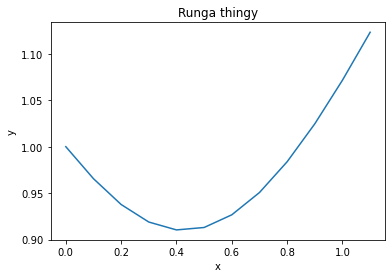

In [131]:
#problem 10 solution
plt.xlabel('x')
plt.ylabel('y')
plt.title('Runga thingy')
plt.plot(x, y)